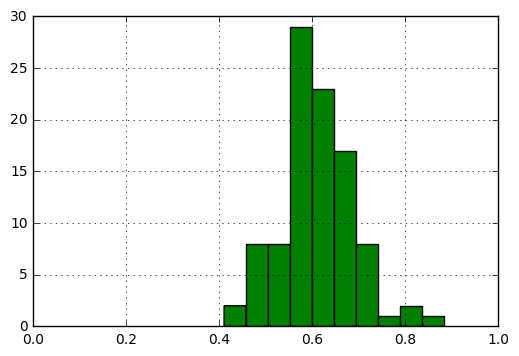

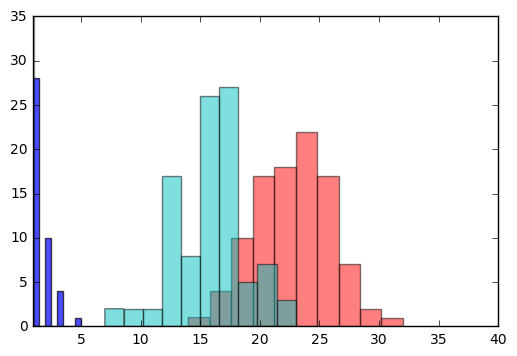

In [141]:
# Markov chain sample:

from random import randint
import sys
import matplotlib.pyplot as plt
import numpy

State_A = ['A','A','A','A','B','B','B','B','B','B']
State_B = ['B','B','B','B','A','A','A','A','A','A']
from_A_to_B = 0
from_A_to_A = 0
from_B_to_A = 0
from_B_to_B = 0

def selectFromA(runs):
    if runs == 0:
        return
    else:
        runs-=1      
    i = randint(0,9)
    if State_A[i] == 'A':
        global from_A_to_A
        from_A_to_A+=1
        selectFromA(runs)
    elif State_A[i] == 'B':
        global from_A_to_B
        from_A_to_B+=1
        selectFromB(runs)
    else:
        print "error!"

def selectFromB(runs):
    if runs == 0:
        return
    else:
        runs-=1   
    i = randint(0,9)
    if State_B[i] == 'A':
        global from_B_to_A
        from_B_to_A+=1
        selectFromB(runs)
    elif State_B[i] == 'B':
        global from_B_to_B
        from_B_to_B+=1
        selectFromB(runs)
    else:
        print "error!"

A2Alist = []
A2Blist = []
B2Alist = []
B2Blist = []
ratiolist = []      
for i in xrange(1,100):
    global from_A_to_A
    from_A_to_A = 0
    global from_A_to_B
    from_A_to_B = 0
    global from_B_to_A
    from_B_to_A = 0
    global from_B_to_B
    from_B_to_B = 0
    selectFromA(40)
    A2Alist.append(from_A_to_A)
    A2Blist.append(from_A_to_B)
    B2Alist.append(from_B_to_A)
    B2Blist.append(from_B_to_B)
    ratio = (float)(from_A_to_A + from_B_to_A)/(float)(from_B_to_A + from_B_to_B)
    ratiolist.append(ratio)
    
plt.hist(ratiolist, facecolor='green')
plt.axis([0, 1, 0, 30])
plt.grid(True)
plt.show()

bins = numpy.linspace(-10, 10, 100)
plt.hist(A2Alist, alpha=0.7, label='x')
plt.hist(A2Blist, alpha=0.3, label='y')
plt.hist(B2Alist, alpha=0.5, label='z')
plt.hist(B2Blist, alpha=0.5, label='q')
plt.axis([1, 40, 0, 35])
plt.show()